<a href="https://colab.research.google.com/github/ben854719/Autonomous-Health-Monitoring-Emergency-Response/blob/main/ML_Health_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim

# Import the dataset for the critical injuries and the fatalities.
critical_injuries_cy_2011_2023_df = pd.read_csv('critical_injuries_cy_2011_2023.csv')
fatalities_cy_2011_2023_df = pd.read_csv('fatalities_cy_2011_2023.csv')

# Create Scaler Object.
scaler =  StandardScaler()

# Numpy array for the datasets.
critical_injuries_numerical_features = ['Calendar Year', 'Construction Health and Safety Program', 'Industrial Health and Safety Program', 'Health Care Program', 'Mining Health and Safety Program', 'Program Unassigned', 'Total']
fatalities_numerical_features = ['Calendar Year', 'Construction', 'Industrial', 'Health Care', 'Mining', 'Total']

for feature in critical_injuries_numerical_features:
  if critical_injuries_cy_2011_2023_df[feature].dtype == 'object':
    le = LabelEncoder()
    critical_injuries_cy_2011_2023_df[feature] = le.fit_transform(critical_injuries_cy_2011_2023_df[feature])


for feature in fatalities_numerical_features:
  if fatalities_cy_2011_2023_df[feature].dtype == 'object':
    le = LabelEncoder()
    fatalities_cy_2011_2023_df[feature] = le.fit_transform(fatalities_cy_2011_2023_df[feature])

# fit the scaler to the numerical features.
scaler.fit(critical_injuries_cy_2011_2023_df[critical_injuries_numerical_features])
critical_injuries_cy_2011_2023_df[critical_injuries_numerical_features] = scaler.transform(critical_injuries_cy_2011_2023_df[critical_injuries_numerical_features])

scaler.fit(fatalities_cy_2011_2023_df[fatalities_numerical_features])
fatalities_cy_2011_2023_df[fatalities_numerical_features] = scaler.transform (fatalities_cy_2011_2023_df[fatalities_numerical_features])

# Create the tensor of input features and target variable.
X = torch.tensor(critical_injuries_cy_2011_2023_df[critical_injuries_numerical_features].values, dtype=torch.float32)
y = torch.tensor(fatalities_cy_2011_2023_df[fatalities_numerical_features].values, dtype=torch.float32)

# train the model of the dataset.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# set a random seed.
torch.manual_seed(42)

# Scale target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert y_train and y_test back to PyTorch tensors and reshape
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Check for NaN/Inf in input and target
x_train[torch.isnan(x_train)] = 0
x_train[torch.isinf(x_train)] = 0
y_train[torch.isnan(y_train)] = 0
y_train[torch.isinf(y_train)] = 0
x_test[torch.isnan(x_test)] = 0
x_test[torch.isinf(x_test)] = 0
y_test[torch.isnan(y_test)] = 0
y_test[torch.isinf(y_test)] = 0

# Define the model using nn.Sequential.
model = nn.Sequential(
    nn.Linear(X.shape[1], 32), # Use the number of input features from X
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, y.shape[1]) # Use the number of output features from y
)

# MSE Loss Function + optimizer.
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200

epoch_format = 'Epoch[{0}/{1}], MSE.loss:{2:.4f}'

for epoch in range(num_epochs):
    predictions = model(x_train)
    MSE = loss_fn(predictions, y_train)

    # Check if loss is NaN and break.
    if torch.isnan(MSE):
        print(f"Loss is NaN at epoch {epoch + 1}. Stopping training.")
        break

    MSE.backward()

# Check for NaN/Inf in model parameters and break.
    for name, param in model.named_parameters():
        if param.grad is not None and (torch.isnan(param.grad).any() or torch.isinf(param.grad).any()):
            display.display(f"NaN or Inf detected in gradients for parameter '{name}' at epoch {epoch + 1}.")
            break

    # Replace NaN/Inf in gradients with 0
    for name, param in model.named_parameters():
        if param.grad is not None and (torch.isnan(param.grad).any() or torch.isinf(param.grad).any()):
            param.grad.data.fill_(0)

# Gradient Clipping.
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        display.display(epoch_format.format(epoch + 1, num_epochs, MSE.item()))

# Initialize weights after optimizer.step()
for m in model.modules():
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

'Epoch[10/200], MSE.loss:1.0174'

'Epoch[20/200], MSE.loss:1.0038'

'Epoch[30/200], MSE.loss:0.9801'

'Epoch[40/200], MSE.loss:0.9341'

'Epoch[50/200], MSE.loss:0.9062'

'Epoch[60/200], MSE.loss:0.8853'

'Epoch[70/200], MSE.loss:0.8396'

'Epoch[80/200], MSE.loss:0.8085'

'Epoch[90/200], MSE.loss:0.7935'

'Epoch[100/200], MSE.loss:0.7708'

'Epoch[110/200], MSE.loss:0.7444'

'Epoch[120/200], MSE.loss:0.7139'

'Epoch[130/200], MSE.loss:0.6922'

'Epoch[140/200], MSE.loss:0.6884'

'Epoch[150/200], MSE.loss:0.7075'

'Epoch[160/200], MSE.loss:0.6729'

'Epoch[170/200], MSE.loss:0.6712'

'Epoch[180/200], MSE.loss:0.6881'

'Epoch[190/200], MSE.loss:0.6579'

'Epoch[200/200], MSE.loss:0.6676'

In [ ]:
# formula for torch save.
torch.save(model.state_dict(), 'model.pth')

In [ ]:
# Load the model.
model = nn.Sequential(
    nn.Linear(x_test.shape[1], 32), # Use the number of input features from x_test
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, y_test.shape[1]) # Use the number of output features from y_test
)

# Load the state dictionary directly into the model
model.load_state_dict(torch.load('model.pth', weights_only=True))

# Set the model to evaluation mode.
model.eval()

#Replace NaN Valies in x_test with 0.
x_test[torch.isnan(x_test)] = 0

# Make predictions and calculate MSE.
with torch.no_grad():
    predictions = model(x_test)
    MSE = loss_fn(predictions, y_test)
    display.display(MSE)

tensor(1.0967)

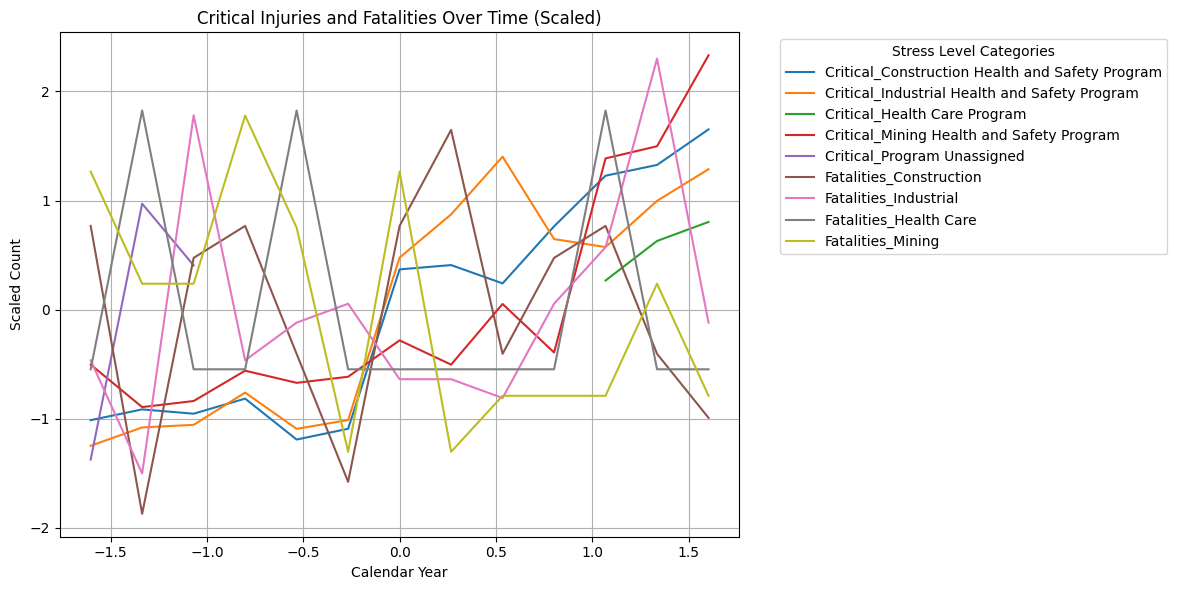

In [ ]:
# Data Visualization.

plt.figure(figsize=(12, 6))

# Plot Critical Injuries categories
critical_cols = [col for col in merged_df.columns if 'Critical_' in col]
for col in critical_cols:
    plt.plot(merged_df['Calendar Year'], merged_df[col], label=col)

# Plot Fatalities categories
fatalities_cols = [col for col in merged_df.columns if 'Fatalities_' in col]
for col in fatalities_cols:
    plt.plot(merged_df['Calendar Year'], merged_df[col], label=col)

plt.xlabel('Calendar Year')
plt.ylabel('Scaled Count')
plt.title('Critical Injuries and Fatalities Over Time (Scaled)')
plt.legend(title='Stress Level Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Explanation:

This graph shows the scaled trends of different categories of critical injuries and fatalities over the calendar years, allowing us to observe changes and patterns in these incidents over time.